In [1]:
import numpy as np
import pandas as pd
import japanize_matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import os
os.chdir("../")

In [2]:
df = pd.read_csv("csv/ヨルシカ_20231119.csv").dropna(how="any")

# 単語の一致率

In [3]:
MATCHED_RATE_A = "matched_rate_A"
MATCHED_RATE_S = "matched_rate_S"

df[MATCHED_RATE_A] = df["matched_word_count_A"] / df["word_count_A"]
df[MATCHED_RATE_S] = df["matched_word_count_S"] / df["word_count_S"]

center = len(df) // 2

x_max_wmr = df[MATCHED_RATE_A].max()
x_min_wmr = df[MATCHED_RATE_A].min()
y_max_wmr = df[MATCHED_RATE_S].max()
y_min_wmr = df[MATCHED_RATE_S].min()

xy_max_wmr = max(x_max_wmr, y_max_wmr) + 0.05
xy_min_wmr = min(x_min_wmr, y_min_wmr) - 0.05

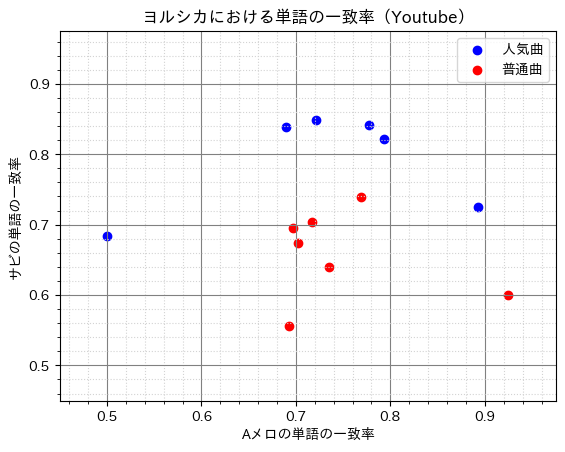

In [4]:
sort_by_youtube = df.sort_values("youtube_play_times", ascending=False)
pop_youtube = sort_by_youtube[:center]
unpop_youtube = sort_by_youtube[center:]

plt.scatter(x=MATCHED_RATE_A, y=MATCHED_RATE_S, data=pop_youtube, color='blue', label='人気曲')
plt.scatter(x=MATCHED_RATE_A, y=MATCHED_RATE_S, data=unpop_youtube, color='red', label='普通曲')

plt.title("ヨルシカにおける単語の一致率（Youtube）")
plt.xlabel("Aメロの単語の一致率")
plt.ylabel("サビの単語の一致率")
plt.legend()
plt.xlim(xy_min_wmr, xy_max_wmr)
plt.ylim(xy_min_wmr, xy_max_wmr)
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')

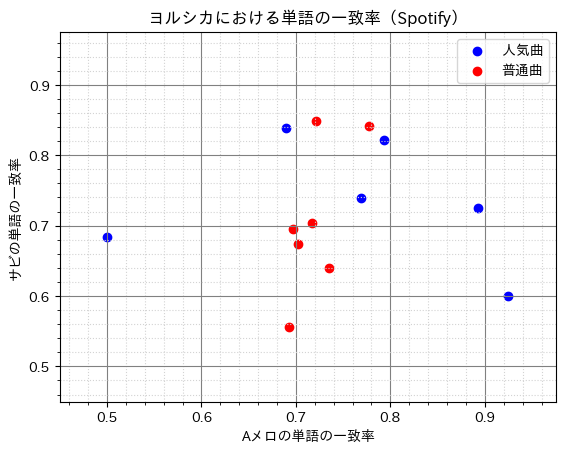

In [5]:
sort_by_spotify = df.sort_values("spotify_popularity", ascending=False)
pop_spotify = sort_by_spotify[:center]
unpop_spotify = sort_by_spotify[center:]

plt.scatter(x=MATCHED_RATE_A, y=MATCHED_RATE_S, data=pop_spotify, color='blue', label='人気曲')
plt.scatter(x=MATCHED_RATE_A, y=MATCHED_RATE_S, data=unpop_spotify, color='red', label='普通曲')

plt.title("ヨルシカにおける単語の一致率（Spotify）")
plt.xlabel("Aメロの単語の一致率")
plt.ylabel("サビの単語の一致率")
plt.legend()
plt.xlim(xy_min_wmr, xy_max_wmr)
plt.ylim(xy_min_wmr, xy_max_wmr)
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')

# 木構造の類似度

In [6]:
TREE_SIMILARITY_A = "tree_similarity_A"
TREE_SIMILARITY_S = "tree_similarity_S"

df = df[df["subtree_combination_count_A"] != -1]
df = df[df["subtree_combination_count_S"] != -1]

df[TREE_SIMILARITY_A] = df["matched_subtree_count_A"] / df["subtree_combination_count_A"]
df[TREE_SIMILARITY_S] = df["matched_subtree_count_S"] / df["subtree_combination_count_S"]

center = len(df) // 2

x_max_ts = df[TREE_SIMILARITY_A].max()
x_min_ts = df[TREE_SIMILARITY_A].min()
y_max_ts = df[TREE_SIMILARITY_S].max()
y_min_ts = df[TREE_SIMILARITY_S].min()

xy_max_ts = max(x_max_ts, y_max_ts) + 0.01
xy_min_ts = min(x_min_ts, y_min_ts) - 0.01

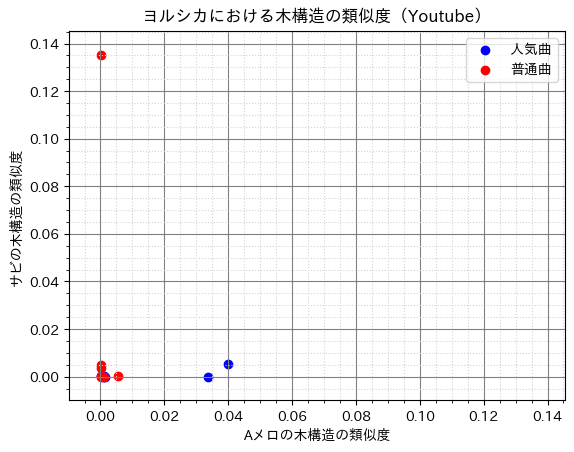

In [7]:
sort_by_youtube = df.sort_values("youtube_play_times", ascending=False)
pop_youtube = sort_by_youtube[:center]
unpop_youtube = sort_by_youtube[center:]

plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=pop_youtube, color='blue', label='人気曲')
plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=unpop_youtube, color='red', label='普通曲')

plt.title("ヨルシカにおける木構造の類似度（Youtube）")
plt.xlabel("Aメロの木構造の類似度")
plt.ylabel("サビの木構造の類似度")
plt.xlim(xy_min_ts, xy_max_ts)
plt.ylim(xy_min_ts, xy_max_ts)
plt.legend()
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')

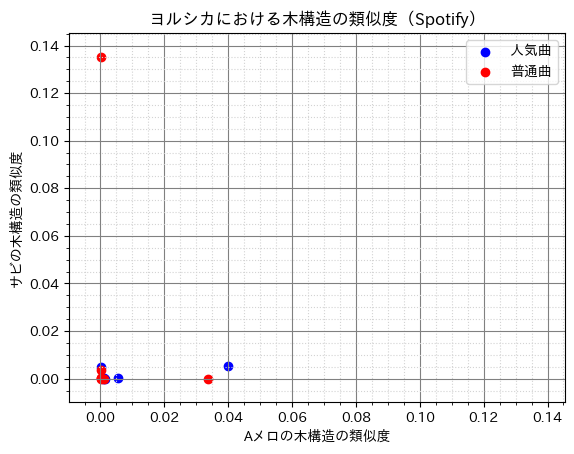

In [8]:
sort_by_spotify = df.sort_values("spotify_popularity", ascending=False)
pop_spotify = sort_by_spotify[:center]
unpop_spotify = sort_by_spotify[center:]

plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=pop_spotify, color='blue', label='人気曲')
plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=unpop_spotify, color='red', label='普通曲')

plt.title("ヨルシカにおける木構造の類似度（Spotify）")
plt.xlabel("Aメロの木構造の類似度")
plt.ylabel("サビの木構造の類似度")
plt.xlim(xy_min_ts, xy_max_ts)
plt.ylim(xy_min_ts, xy_max_ts)
plt.legend()
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')